Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

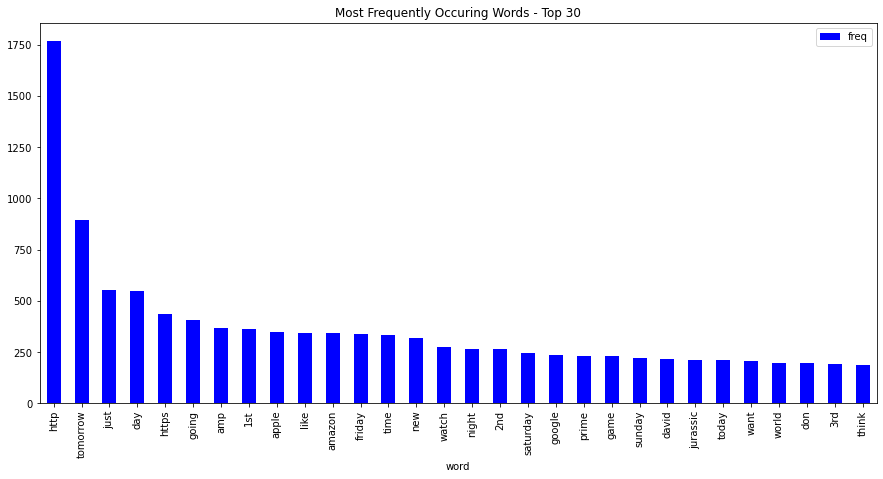

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

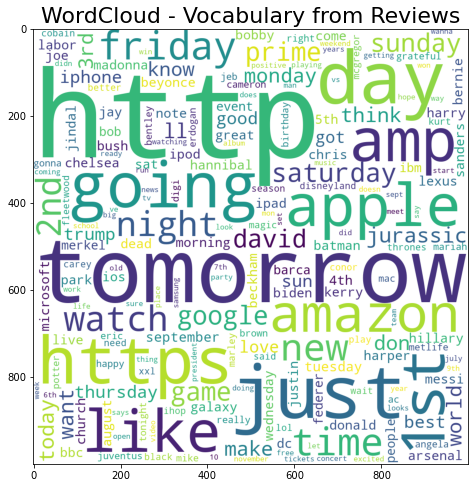

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [54]:
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter 
import itertools
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from joblib import dump, load

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data import 

In [55]:
import pandas as pd

df = pd.read_table('./data/twitter-2016train-A.txt' , usecols=[0,1,2], encoding='utf-8', names=['id','sentiment', 'tweet'])
#dataTest = pd.read_table('../input/semevalll/SemEval2017-test.txt', usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])                   
#combine = [dataTrain,dataTest]
df

,id,sentiment,tweet
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...


# add label

In [56]:
CATEGORY_INDEX = {
    "negative": -1,
    "neutral": 0,
    "positive": 1
}

"""import data """
raw_label = df['sentiment'].values.tolist()
rawlabel = []
for i in range(len(raw_label)):
    rawlabel.append(CATEGORY_INDEX[raw_label[i]])
rawlabel

[-1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 0

In [57]:
df['label'] = rawlabel
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


# data preprocesing

In [ ]:
## 

In [58]:
def remove_hashtag(df, col = 'tweet'):
    for letter in r'#.][!XR':
        df[col] = df[col].astype(str).str.replace(letter,'', regex=True)
    return df
    

        
remove_hashtag(df)
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but should we ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a windows10 Universal App ...,0
...,...,...,...,...
5863,639855845958885376,positive,@acalto_SK ok good to know Punting at MetLife ...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


In [62]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [32]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [60]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [61]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = re.sub(r'@[^\s]+', ' ', doc)
    doc = re.sub(r'_', ' ', doc)
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    #doc= normalize_arabic(doc)
    # remove repeated letters
    doc=remove_repeating_char(doc)
    #stemming
    doc = stemmer.stem(doc)
   
    return doc



stemmer = ISRIStemmer()
df["tweet"] = df['tweet'].apply(lambda x: processDocument(x, stemmer))
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear the newOofice for Mac is great and al but...,-1
1,628976607420645377,negative,how about you make a system that doesnt eat m...,-1
2,629023169169518592,negative,I may be ignorant on this isue but should we c...,-1
3,629179223232479232,negative,Thanks to I just may be switching over to,-1
4,629186282179153920,neutral,If I make a game as a windows Universal Ap Wil...,0
...,...,...,...,...
5863,639855845958885376,positive,ok god to know Punting at MetLife in December...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wana go to th...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorow Colombia vs ...,1


In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english')) 
df["tweet"] = df['tweet'].apply(lambda x: word_tokenize(x))

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
clean_df["tweet"] = clean_df["tweet"].apply(tokenizer.tokenize)
# print(clean_df['text'].values[0])
clean_df

In [38]:
stopwords_list = stopwords.words('english')
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
print(listToStr)


i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't


In [39]:
df["tweet"] = df["tweet"].apply(lambda x: [item for item in x if item not in stopwords_list])
df

,id,sentiment,tweet,label
0,628949369883000832,negative,"[dear, newOofice, Mac, great, al, Lync, update...",-1
1,628976607420645377,negative,"[make, system, doesnt, eat, frigin, discs, Thi...",-1
2,629023169169518592,negative,"[I, may, ignorant, isue, celebrate, parental, ...",-1
3,629179223232479232,negative,"[Thanks, I, may, switching]",-1
4,629186282179153920,neutral,"[If, I, make, game, windows, Universal, Ap, Wi...",0
...,...,...,...,...
5863,639855845958885376,positive,"[ok, god, know, Punting, MetLife, December, ta...",1
5864,639979760735662080,neutral,"[everyone, sat, around, metlife, anoying, didn...",0
5865,640196838260363269,neutral,"[giants, niners, fans, would, wana, go, sunday...",0
5866,640975710354567168,positive,"[Anybody, want, ticket, tomorow, Colombia, vs,...",1


In [53]:
df.to_pickle('./data/processed_data.pkl')

In [42]:
def countPropetries(df):
    all_words = [word for tokens in df["tweet"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in df["tweet"]]

    VOCAB = sorted(list(set(all_words)))

    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % max(sentence_lengths))
    return all_words

positive_df = df.loc[df["label"] ==1]
neutral_df = df.loc[df["label"] == 0]
negative_df = df.loc[df["label"] == -1]

print("positive : ")
positive_words = countPropetries(positive_df)
print("\nneutral : ")
neutral_words = countPropetries(neutral_df)
print("\nnegative : ")
negative_words = countPropetries(negative_df)

positive : 
36744 words total, with a vocabulary size of 8952
Max sentence length is 579

neutral : 
25007 words total, with a vocabulary size of 7532
Max sentence length is 648

negative : 
10800 words total, with a vocabulary size of 4109
Max sentence length is 23


In [43]:
def plot(all_words, title):
    counted_words = Counter(all_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(25):
        words.append(letter)
        counts.append(count)

    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

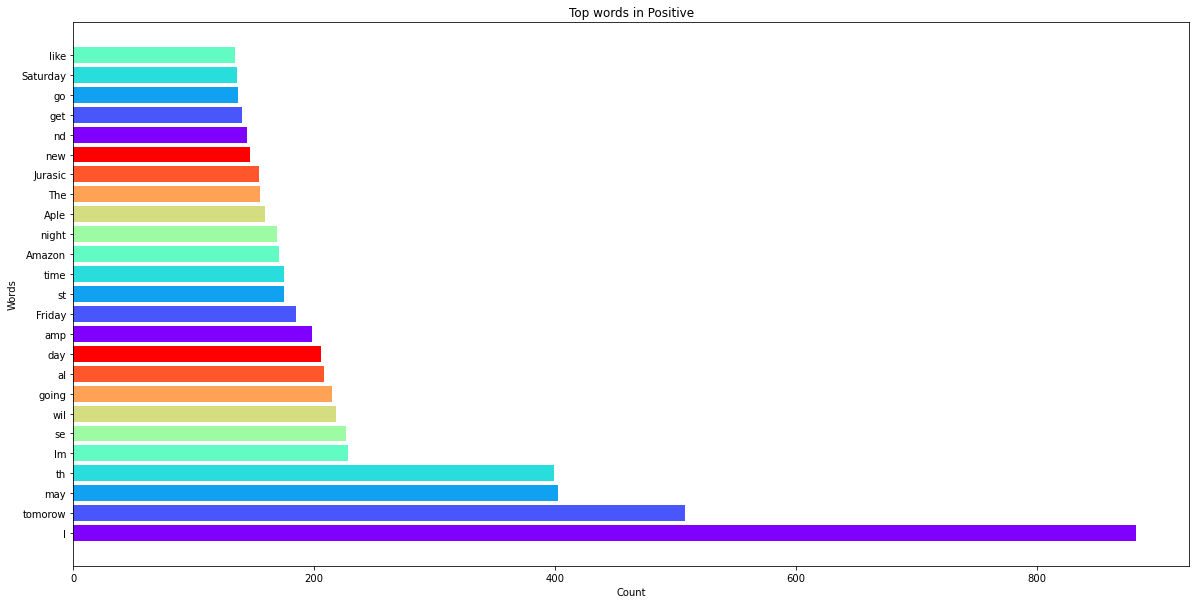

In [44]:
plot(positive_words, 'Top words in Positive')

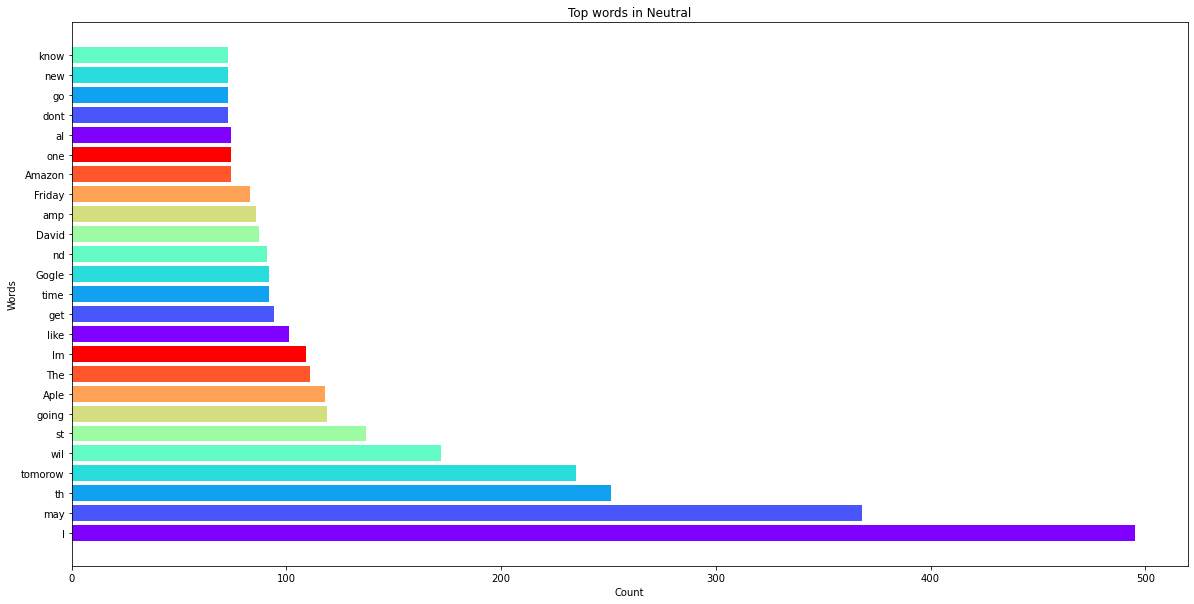

In [45]:
plot(neutral_words, 'Top words in Neutral')

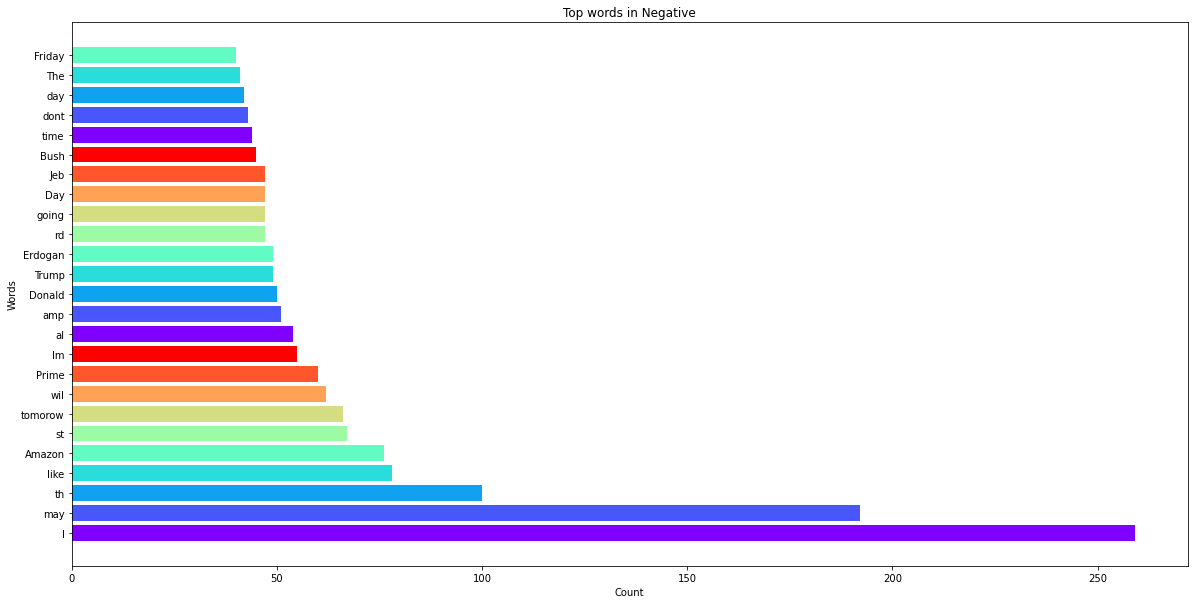

In [46]:
plot(negative_words, 'Top words in Negative')

In [47]:
y = df['label']
X = df['tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [48]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

In [49]:
model = Pipeline([
                    ("tfidf", word_vectorizer), # convert words to numbers using tfidf
                    ("clf", SVC()) # model the text
])

# Fit the pipeline to the training data
model.fit(X_train.astype('str'), y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, strip_accents='unicode',
                                 sublinear_tf=True)),
                ('clf', SVC())])

In [50]:
dump(model, "svm_model.joblib")

['svm_model.joblib']

In [51]:
def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

y_pred = model.predict(X_test.astype('str'))
result = calculate_results(y_test, y_pred)
result

{'accuracy': 55.48738922972052,
 'precision': 0.46692436792149655,
 'recall': 0.5548738922972052,
 'f1': 0.4891173700700606}

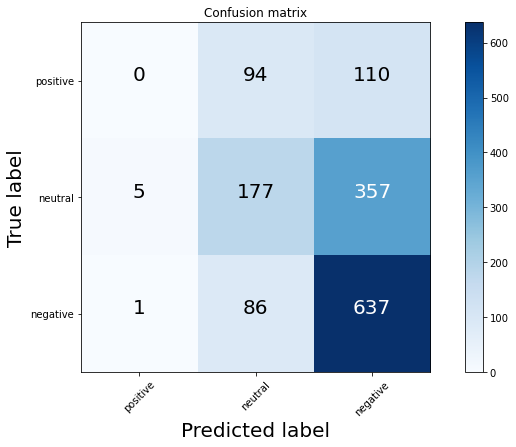

In [52]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['positive', 'neutral', 'negative'])